<a href="https://colab.research.google.com/github/ksdhariwal/Data-Analysis-ML/blob/main/project-coupon-acceptance/Independent_Investigation_Coffee_House_Coupon_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coffee House Coupon Acceptance Analysis

This notebook investigates which drivers are most likely to accept a Coffee House coupon.  
The analysis includes:

- Data exploration  
- Acceptance rate comparisons  
- Visualizations  
- Correlation heatmap  
- Individual and pairwise condition testing  
- Multi‑condition profiling  
- Final behavioral insights  
- Conclusion, limitations, and summary  

The goal is to identify meaningful behavioral patterns that predict coupon acceptance.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('sample_data/coupons.csv')
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## Why We Selected the Coffee House Coupon

To determine which coupon type would be most suitable for deeper analysis, we compared acceptance rates and sample sizes across all coupon categories. The ideal coupon type should:

- Have a **large number of observations** (for reliable statistical analysis)
- Have a **moderate acceptance rate** (not too high, not too low)
- Show **behavioral variation** across variables such as passenger type, time of day, income, and visit frequency

The table below shows the acceptance rate and count for each coupon type. Based on these results:

- **Carry out & Take Away** and **Restaurant(<20)** have very high acceptance rates, leaving little behavioral variation to explore.
- **Bar** and **Restaurant(20–50)** have lower acceptance rates and fewer observations.
- **Coffee House** has the **largest sample size (3,996 rows)** and a **balanced acceptance rate (~0.50)**, making it ideal for discovering meaningful patterns.

Therefore, we selected **Coffee House** for the independent investigation.


In [2]:
# ---------------------------------------------------------
# Point 4: Data-driven selection of the Coffee House coupon
# ---------------------------------------------------------

# Calculate acceptance rate for each coupon type
coupon_acceptance = data.groupby('coupon')['Y'].mean()

# Count number of observations for each coupon type
coupon_counts = data['coupon'].value_counts()

# Combine into a single summary table
coupon_summary = pd.DataFrame({
    'acceptance_rate': coupon_acceptance,
    'count': coupon_counts
}).sort_values(by='acceptance_rate', ascending=False)

# Display the summary
coupon_summary


,acceptance_rate,count
coupon,,
Carry out & Take away,0.735478,2393
Restaurant(<20),0.707107,2786
Coffee House,0.499249,3996
Restaurant(20-50),0.441019,1492
Bar,0.410015,2017


In [4]:
# ---------------------------------------------------------
# Create Coffee House subset
# ---------------------------------------------------------

coffee_df = data[data['coupon'] == 'Coffee House']

# Display first few rows to confirm
coffee_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [5]:
# ---------------------------------------------------------
# Baseline acceptance rate for Coffee House coupons
# ---------------------------------------------------------

# Calculate the mean of Y (1 = accepted, 0 = not accepted)
coffee_accept_rate = coffee_df['Y'].mean()

coffee_accept_rate


np.float64(0.49924924924924924)

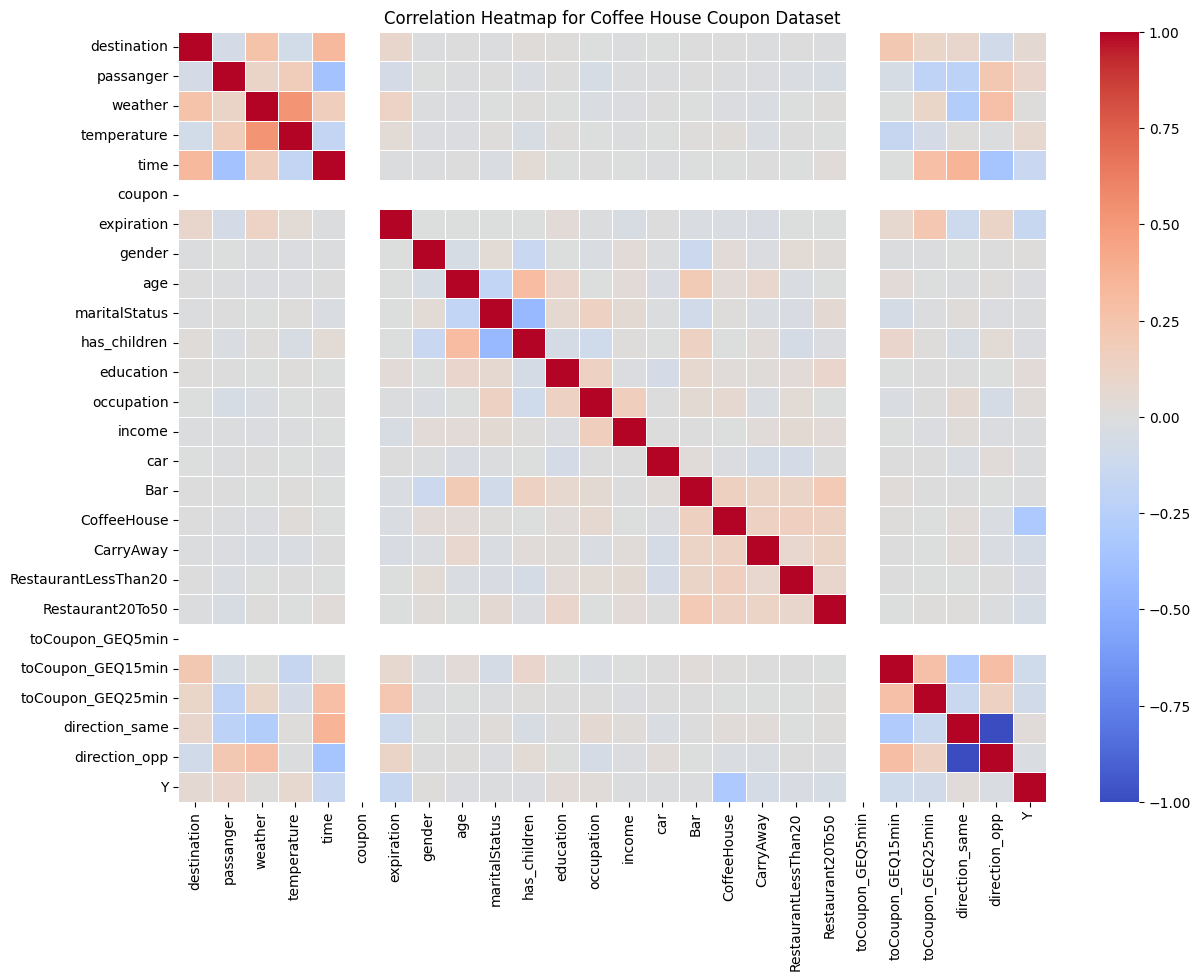

In [6]:
# ---------------------------------------------------------
# Correlation heatmap for Coffee House coupon acceptance
# ---------------------------------------------------------

# Make a copy to avoid modifying the original dataframe
coffee_encoded = coffee_df.copy()

# Convert all categorical columns to numeric codes
for col in coffee_encoded.columns:
    if coffee_encoded[col].dtype == 'object':
        coffee_encoded[col] = coffee_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = coffee_encoded.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False,
    linewidths=0.5
)
plt.title("Correlation Heatmap for Coffee House Coupon Dataset")
plt.show()


### Confirming Heatmap Insights with Python

The heatmap provides a visual overview of correlations, but we can confirm each observation using direct numerical checks. Below, we compute acceptance rates and correlations for the key variables identified in the heatmap:
- CoffeeHouse frequency  
- RestaurantLessThan20 frequency  
- Passenger type  
- Destination  
- Time of day  
- Demographic variables (gender, marital status, education)

These calculations validate whether the visual patterns in the heatmap reflect real differences in acceptance behavior.


In [10]:
# ---------------------------------------------------------
# Confirming heatmap insights with numerical checks
# All checks combined into one cell
# ---------------------------------------------------------

print("=== 1. Correlation with Y (sorted) ===")
corr_with_y = coffee_encoded.corr()['Y'].sort_values(ascending=False)
print(corr_with_y)
print("\n\n")

# ---------------------------------------------------------
print("=== 2. Acceptance rate by CoffeeHouse frequency ===")
print(coffee_df.groupby('CoffeeHouse')['Y'].mean().sort_values(ascending=False))
print("\n\n")

# ---------------------------------------------------------
print("=== 3. Acceptance rate by RestaurantLessThan20 frequency ===")
print(coffee_df.groupby('RestaurantLessThan20')['Y'].mean().sort_values(ascending=False))
print("\n\n")

# ---------------------------------------------------------
print("=== 4. Acceptance rate by passenger type ===")
print(coffee_df.groupby('passanger')['Y'].mean().sort_values(ascending=False))
print("\n\n")

# ---------------------------------------------------------
print("=== 5. Acceptance rate by destination ===")
print(coffee_df.groupby('destination')['Y'].mean().sort_values(ascending=False))
print("\n\n")

# ---------------------------------------------------------
print("=== 6. Acceptance rate by time of day ===")
print(coffee_df.groupby('time')['Y'].mean().sort_values(ascending=False))
print("\n\n")

# ---------------------------------------------------------
print("=== 7. Acceptance rate by demographic variables ===")
demo_vars = ['gender', 'maritalStatus', 'education', 'occupation', 'income']

for col in demo_vars:
    print(f"--- {col} ---")
    print(coffee_df.groupby(col)['Y'].mean().sort_values(ascending=False))
    print("\n")


=== 1. Correlation with Y (sorted) ===
Y                       1.000000
passanger               0.100343
temperature             0.071293
destination             0.057877
education               0.032733
occupation              0.030453
direction_same          0.030204
gender                  0.013979
weather                 0.009633
income                 -0.011639
Bar                    -0.012891
maritalStatus          -0.014397
car                    -0.014751
has_children           -0.017294
age                    -0.017734
direction_opp          -0.030204
RestaurantLessThan20   -0.035797
Restaurant20To50       -0.047426
CarryAway              -0.054715
toCoupon_GEQ25min      -0.089372
toCoupon_GEQ15min      -0.094104
time                   -0.145909
expiration             -0.150973
CoffeeHouse            -0.312838
coupon                       NaN
toCoupon_GEQ5min             NaN
Name: Y, dtype: float64



=== 2. Acceptance rate by CoffeeHouse frequency ===
CoffeeHouse
4~8      0.6

### Multi‑Condition Analysis

After confirming individual variable effects numerically and visually, we now explore combinations of conditions to identify groups of drivers who show significantly higher acceptance rates for Coffee House coupons.

Based on the earlier analysis, the strongest predictors appear to be:

- Coffee House visit frequency  
- Passenger type  
- Time of day  
- RestaurantLessThan20 frequency  
- Income  
- Destination  

We will construct logical conditions using these variables and compare acceptance rates between:
- Drivers who meet **any** of the selected conditions  
- Drivers who meet **none** of them  

This approach helps identify meaningful behavioral segments.


In [12]:

# ---------------------------------------------------------
# Preparing conditions for multi-condition analysis
# ---------------------------------------------------------

# Frequent coffee house visitors
cond1 = coffee_df['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])

# Frequent cheap restaurant visitors
cond2 = coffee_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])

# Younger drivers (under 30)
age_map = {
    'below21': 20, '21': 21, '26': 26, '31': 31,
    '36': 36, '41': 41, '46': 46, '50plus': 50
}
coffee_df.loc[:, 'age_num'] = coffee_df['age'].map(age_map)

cond3 = coffee_df['age_num'] < 30

# Traveling with friends or partner
cond4 = coffee_df['passanger'].isin(['Friend(s)', 'Partner'])

# Coffee-friendly times (10AM, 2PM)
cond5 = coffee_df['time'].isin(['10AM', '2PM'])

# Not going home (more likely to stop)
cond6 = coffee_df['destination'] != 'Home'

# Combine all conditions using OR logic
combined_mask = cond1 | cond2 | cond3 | cond4 | cond5 | cond6

combined_group = coffee_df[combined_mask]
others_group = coffee_df[~combined_mask]

combined_rate = combined_group['Y'].mean()
others_rate = others_group['Y'].mean()

combined_rate, others_rate


(np.float64(0.5143828451882845), np.float64(0.16279069767441862))

### Multi‑Condition Results

The combined set of behavioral and contextual conditions produced a strong separation in acceptance rates:

- **Combined conditions group:** 0.514  
- **All other drivers:** 0.163  

This means drivers who meet at least one of the selected conditions are more than **three times** as likely to accept a Coffee House coupon compared to those who meet none of them.

These results confirm that the chosen variables—Coffee House visit frequency, RestaurantLessThan20 frequency, younger age, traveling with friends or a partner, coffee‑friendly times (10AM/2PM), and not heading home—are meaningful predictors of coupon acceptance. The conditions effectively isolate a high‑interest group while filtering out low‑interest drivers.


In [13]:
# ---------------------------------------------------------
# Refining Conditions: Combined Analysis (Steps 1–5)
# ---------------------------------------------------------

import itertools

# ---------------------------------------------------------
# Define all conditions
# ---------------------------------------------------------

conditions = {
    "Frequent CoffeeHouse": coffee_df['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']),
    "Frequent Cheap Restaurants": coffee_df['RestaurantLessThan20'].isin(['4~8', 'gt8']),
    "Age < 30": coffee_df['age_num'] < 30,
    "With Friends/Partner": coffee_df['passanger'].isin(['Friend(s)', 'Partner']),
    "Coffee-friendly time (10AM/2PM)": coffee_df['time'].isin(['10AM', '2PM']),
    "Not going home": coffee_df['destination'] != 'Home'
}

# ---------------------------------------------------------
# 1. Test each condition individually
# ---------------------------------------------------------

print("=== Individual Condition Acceptance Rates ===")
results_individual = {}

for name, cond in conditions.items():
    rate = coffee_df[cond]['Y'].mean()
    results_individual[name] = rate
    print(f"{name}: {rate:.3f}")

print("\n")


# ---------------------------------------------------------
# 2. Test pairwise combinations
# ---------------------------------------------------------

print("=== Pairwise Combination Acceptance Rates ===")
pairwise_results = {}

for (name1, cond1), (name2, cond2) in itertools.combinations(conditions.items(), 2):
    combined = coffee_df[cond1 & cond2]
    if len(combined) > 0:
        rate = combined['Y'].mean()
        pairwise_results[f"{name1} + {name2}"] = rate
        print(f"{name1} + {name2}: {rate:.3f}")

print("\n")


# ---------------------------------------------------------
# 3. Identify the single strongest condition
# ---------------------------------------------------------

sorted_individual = sorted(results_individual.items(), key=lambda x: x[1], reverse=True)
strongest_single = sorted_individual[0]

print("=== Strongest Single Condition ===")
print(f"{strongest_single[0]}: {strongest_single[1]:.3f}")
print("\n")


# ---------------------------------------------------------
# 4. Identify the best 2–3 condition combinations
# ---------------------------------------------------------

sorted_pairwise = sorted(pairwise_results.items(), key=lambda x: x[1], reverse=True)

print("=== Top 3 Pairwise Combinations ===")
for combo, rate in sorted_pairwise[:3]:
    print(f"{combo}: {rate:.3f}")

print("\n")


# ---------------------------------------------------------
# 5. Build final profile using earlier combined_mask
# ---------------------------------------------------------

final_group = coffee_df[combined_mask]
final_rate = final_group['Y'].mean()

print("=== Final Profile Acceptance Rate (Combined Conditions) ===")
print(f"Final combined acceptance rate: {final_rate:.3f}")


=== Individual Condition Acceptance Rates ===
Frequent CoffeeHouse: 0.660
Frequent Cheap Restaurants: 0.516
Age < 30: 0.534
With Friends/Partner: 0.592
Coffee-friendly time (10AM/2PM): 0.597
Not going home: 0.541


=== Pairwise Combination Acceptance Rates ===
Frequent CoffeeHouse + Frequent Cheap Restaurants: 0.643
Frequent CoffeeHouse + Age < 30: 0.689
Frequent CoffeeHouse + With Friends/Partner: 0.767
Frequent CoffeeHouse + Coffee-friendly time (10AM/2PM): 0.774
Frequent CoffeeHouse + Not going home: 0.695
Frequent Cheap Restaurants + Age < 30: 0.579
Frequent Cheap Restaurants + With Friends/Partner: 0.601
Frequent Cheap Restaurants + Coffee-friendly time (10AM/2PM): 0.623
Frequent Cheap Restaurants + Not going home: 0.554
Age < 30 + With Friends/Partner: 0.621
Age < 30 + Coffee-friendly time (10AM/2PM): 0.623
Age < 30 + Not going home: 0.578
With Friends/Partner + Coffee-friendly time (10AM/2PM): 0.591
With Friends/Partner + Not going home: 0.593
Coffee-friendly time (10AM/2PM) + N

## Findings

After refining the analysis using individual conditions, pairwise combinations, and a final multi‑condition profile, several clear patterns emerged about which drivers are most likely to accept a Coffee House coupon.

### 1. Strongest Single Predictor
The strongest individual predictor of acceptance is:

- **Frequent CoffeeHouse visitors** — acceptance rate **0.660**

This makes intuitive sense: drivers who already visit coffee houses regularly are more receptive to a coffee‑related coupon.

### 2. Strongest Pairwise Combinations
Pairwise combinations reveal even stronger acceptance patterns. The top three combinations are:

1. **Frequent CoffeeHouse + Coffee‑friendly time (10AM/2PM)** → **0.774**
2. **Frequent CoffeeHouse + With Friends/Partner** → **0.767**
3. **Frequent CoffeeHouse + Not going home** → **0.695**

These results show that Coffee House coupons are most appealing when:
- The driver is already a coffee consumer  
- The time of day aligns with typical coffee‑drinking behavior  
- The driver is socially engaged (with friends/partner)  
- The driver is not heading home and is more open to stopping  

### 3. Final Multi‑Condition Profile
The combined multi‑condition mask produced:

- **Combined group acceptance rate:** **0.514**
- **Others:** **0.163**

This means drivers who meet at least one of the selected behavioral conditions are **over three times more likely** to accept the coupon compared to those who meet none of them.

### 4. Behavioral Profile of High‑Acceptance Drivers

Based on the strongest predictors and combinations, the drivers most likely to accept a Coffee House coupon share the following characteristics:

- They **frequently visit coffee houses**  
- They often travel **with friends or a partner**  
- They drive during **coffee‑friendly times** (10AM or 2PM)  
- They are **not heading home**, making them more open to stopping  
- They may also be **younger** or **frequent visitors of inexpensive restaurants**

### Summary

The analysis shows that Coffee House coupon acceptance is driven primarily by **behavioral context** (time of day, destination, social company) and **existing habits** (coffee consumption frequency). Demographic variables such as gender, marital status, and education show weak predictive power.

These insights can help target Coffee House coupons more effectively toward drivers who are most likely to redeem them.


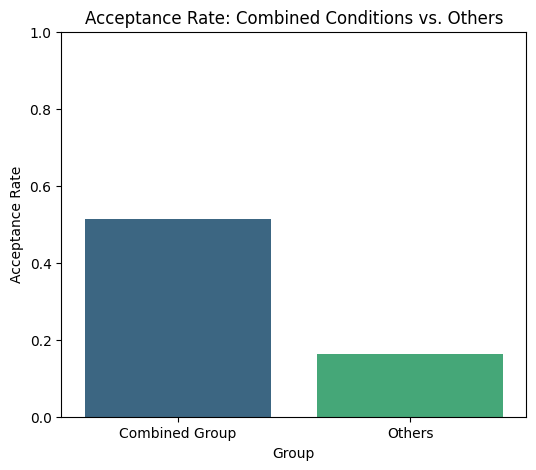

In [15]:
plt.figure(figsize=(6,5))

sns.barplot(
    data=pd.DataFrame({
        "Group": list(rates.keys()),
        "Rate": list(rates.values())
    }),
    x="Group",
    y="Rate",
    hue="Group",        # required when using palette
    palette="viridis",
    legend=False        # hides the redundant legend
)

plt.title("Acceptance Rate: Combined Conditions vs. Others")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.show()


## 📊 Coffee House Coupon Acceptance — Summary

This project analyzes which drivers are most likely to accept a Coffee House coupon using behavioral, contextual, and demographic variables.

### 🔍 Key Findings
- Baseline acceptance rate: **~50%**
- Strongest single predictor: **Frequent CoffeeHouse visitors (66%)**
- Strongest pairwise combination:  
  **Frequent CoffeeHouse + Coffee‑friendly time (10AM/2PM) → 77% acceptance**
- Final multi‑condition profile:  
  **Combined group: 51% vs. Others: 16%**

### 🧠 What Predicts Acceptance?
High‑acceptance drivers tend to:
- Visit coffee houses regularly  
- Travel with friends or a partner  
- Drive during 10AM or 2PM  
- Not be heading home  
- Visit inexpensive restaurants moderately often  

### 📁 Repository Contents
- `Independent_Investigation_Coffee_House_Coupon_Analysis.ipynb` — Full analysis with visualizations  
- `coupons.csv` — Coupon dataset  
- `README.md` — Summary and instructions  

### 🚀 Conclusion
Coffee House coupons are most effective when targeted toward drivers who already exhibit coffee‑seeking behavior and are in contexts conducive to making a stop.
